# Speech Emotion Recognition v0.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from ser_helpers import data_manager as dm
import pandas as pd
from ser_helpers import data_manager, augmentation

### Loading Dataframe

In [3]:
X_train, y_train, X_test, y_test = data_manager.get_augmented_data([augmentation.AUG_NOISE])

shuffle it


In [4]:

def build_model():
    # build the network architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(256, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # 3rd hidden layer
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(8, activation="softmax")
    ])
    return model

In [5]:
i = 1
# for i in range(1, 21):
model = build_model()

# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# model.summary()

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=120,
    batch_size=64,
    verbose=0
)

# evaluate the MLP on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Run: {}: Acc: {}".format(i, str(round(100 * test_accuracy, 2))))



Run: 1: Acc: 58.33


In [6]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

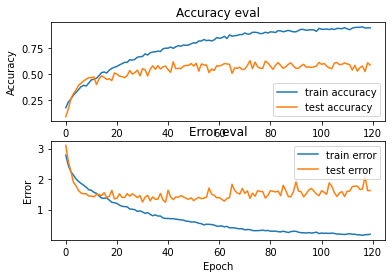

In [7]:
plot_history(history)

In [8]:
test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

# x = inputs_test[42:52]
# emo = targets_test[42:52]
#
# print(model.predict_classes(x))
# print(emo)


NameError: name 'inputs_test' is not defined